In [1]:
# Install the PyDrive wrapper & import libraries.
# This only needs to be done once in a notebook.
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
# This only needs to be done once in a notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# Create & upload a text file.
uploaded = drive.CreateFile({'title': 'Sample file.txt'})
uploaded.SetContentString('Sample upload file content')
uploaded.Upload()
print('Uploaded file with ID {}'.format(uploaded.get('id')))

Uploaded file with ID 1OlFVhKGaGqGiYP4ZDoB67u6V1lSPuMN5


In [11]:
# List .txt files in the root.
#
# Search query reference:
# https://developers.google.com/drive/v2/web/search-parameters
listed = drive.ListFile({'q': "title contains '.csv' and 'root' in parents"}).GetList()
for file in listed:
  print('title {}, id {}'.format(file['title'], file['id']))

title mobile_cleaned.csv, id 1BpvxvCHTRwsqzOv1f_CNic8UNQZFgfap


In [0]:
# Download a file based on its file ID.
#
# A file ID looks like: laggVyWshwcyP6kEI-y_W3P8D26sz
file_id = '1BpvxvCHTRwsqzOv1f_CNic8UNQZFgfap' #https://drive.google.com/open?id=1BpvxvCHTRwsqzOv1f_CNic8UNQZFgfap
downloaded = drive.CreateFile({'id': file_id})
print('Downloaded content "{}"'.format(downloaded.GetContentString()))

In [0]:
downloaded.GetContentFile('mobile_cleaned_local.csv')

In [6]:
!ls

adc.json  mobile_cleaned_local.csv  sample_data


In [0]:
import pandas as pd

In [0]:
df=pd.read_csv('mobile_cleaned_local.csv')

In [10]:
df.head()

,sim_type,aperture,gpu_rank,weight,stand_by_time,processor_frequency,thickness,flash_type,front_camera_resolution,auto_focus,...,micro_sd_slot,screen_pixel_density,water_proof_rate,phone_width,expandable_memory,version,usb_type,battery_capacity,processor_rank,is_liked
0,0,12,55,155.0,250,1.3,10.5,5,2.00,0,...,4,2,3,67.8,64.0,5,3,2000,125,1
1,0,1,55,132.0,300,1.3,10.6,5,0.30,1,...,4,4,6,64.0,32.0,5,3,2000,165,1
2,0,9,55,142.0,329,1.5,8.5,5,2.00,3,...,4,9,6,72.0,32.0,6,3,2500,164,0
3,0,8,55,152.0,385,1.3,8.0,5,2.00,3,...,4,1,3,75.1,32.0,6,3,3000,165,1
4,1,1,55,234.0,385,1.3,7.9,5,1.92,3,...,4,1,6,91.0,32.0,6,3,3000,165,0


In [12]:
df.tail()

,sim_type,aperture,gpu_rank,weight,stand_by_time,processor_frequency,thickness,flash_type,front_camera_resolution,auto_focus,...,micro_sd_slot,screen_pixel_density,water_proof_rate,phone_width,expandable_memory,version,usb_type,battery_capacity,processor_rank,is_liked
104,3,10,14,192.0,540,1.8,9.4,2,2.0,2,...,4,29,6,77.2,256.0,6,3,3410,8,1
105,0,5,3,157.0,400,2.3,7.7,5,5.0,3,...,6,27,1,72.6,200.0,9,3,3600,101,1
106,3,10,6,192.0,384,1.8,7.3,2,5.0,3,...,1,16,6,77.9,0.0,14,13,2750,1,1
107,3,10,12,129.0,250,1.4,6.9,2,1.2,3,...,1,13,6,67.0,0.0,12,13,1810,7,1
108,2,8,3,158.0,400,2.2,7.4,6,8.0,3,...,5,16,6,74.7,0.0,10,12,3000,2,0


In [13]:
type(df)

pandas.core.frame.DataFrame

In [0]:
dir(df)

In [15]:
len(df)

109

In [16]:
df.shape

(109, 40)

In [17]:
df.loc[7]

sim_type                                0.0
aperture                                8.0
gpu_rank                               41.0
weight                                154.0
stand_by_time                         182.0
processor_frequency                     1.0
thickness                               8.1
flash_type                              5.0
front_camera_resolution                 2.0
auto_focus                              3.0
screen_size                             5.0
frames_per_second                      30.0
FM                                      5.0
no_of_reviews_in_gsmarena_in_week       0.0
os                                      0.0
phone_height                          132.0
screen_protection                      26.0
sim_size                                3.0
price                                6599.0
talk_time                               7.0
video_resolution                      720.0
display_resolution                      4.0
removable_battery               

In [0]:
df_short = df[0:10]

In [19]:
df_short.shape

(10, 40)

In [20]:
df_short.head()

,sim_type,aperture,gpu_rank,weight,stand_by_time,processor_frequency,thickness,flash_type,front_camera_resolution,auto_focus,...,micro_sd_slot,screen_pixel_density,water_proof_rate,phone_width,expandable_memory,version,usb_type,battery_capacity,processor_rank,is_liked
0,0,12,55,155.0,250,1.3,10.5,5,2.00,0,...,4,2,3,67.8,64.0,5,3,2000,125,1
1,0,1,55,132.0,300,1.3,10.6,5,0.30,1,...,4,4,6,64.0,32.0,5,3,2000,165,1
2,0,9,55,142.0,329,1.5,8.5,5,2.00,3,...,4,9,6,72.0,32.0,6,3,2500,164,0
3,0,8,55,152.0,385,1.3,8.0,5,2.00,3,...,4,1,3,75.1,32.0,6,3,3000,165,1
4,1,1,55,234.0,385,1.3,7.9,5,1.92,3,...,4,1,6,91.0,32.0,6,3,3000,165,0


In [0]:
df_thin = df[['stand_by_time','price','battery_capacity','expandable_memory','is_liked']]

In [31]:
df_thin.shape

(109, 5)

In [32]:
df_thin.head()

,stand_by_time,price,battery_capacity,expandable_memory,is_liked
0,250,3870,2000,64.0,1
1,300,4059,2000,32.0,1
2,329,4777,2500,32.0,0
3,385,5799,3000,32.0,1
4,385,5990,3000,32.0,0


In [0]:
df_liked = df_thin[df_thin['is_liked']==1]

In [34]:
df_liked.shape

(92, 5)

In [35]:
df_thin['price'].describe()

count      109.000000
mean     19373.211009
std      14039.197220
min       3870.000000
25%       8999.000000
50%      14614.000000
75%      24999.000000
max      64500.000000
Name: price, dtype: float64

In [36]:
df_thin.describe()

,stand_by_time,price,battery_capacity,expandable_memory,is_liked
count,109.00000,109.000000,109.000000,109.000000,109.000000
mean,404.66055,19373.211009,2841.779817,104.513761,0.844037
std,176.44206,14039.197220,655.003963,275.799767,0.364496
min,160.00000,3870.000000,1560.000000,0.000000,0.000000
25%,264.00000,8999.000000,2470.000000,0.000000,1.000000
50%,360.00000,14614.000000,2900.000000,32.000000,1.000000
75%,500.00000,24999.000000,3100.000000,128.000000,1.000000
max,1093.00000,64500.000000,5000.000000,2048.000000,1.000000


In [37]:
df_thin[df_thin['is_liked']==1]['price'].mean()

19393.239130434784

In [38]:
df_thin[df_thin['is_liked']==0]['price'].mean()

19264.823529411766

In [0]:
g = df_thin.groupby(['is_liked'])

In [40]:
print(g)

In [0]:
for key , df_key in g:
  print(key)
  print(df_key)

In [44]:
df_thin.groupby(['is_liked']).describe()

battery_capacity                                                   \
                    count         mean         std     min     25%     50%   
is_liked                                                                     
0                    17.0  2874.941176  591.777035  1624.0  2600.0  2900.0   
1                    92.0  2835.652174  668.850998  1560.0  2457.5  2900.0   

                         expandable_memory               ...       price  \
             75%     max             count        mean   ...         75%   
is_liked                                                 ...               
0         3000.0  4100.0              17.0   68.235294   ...    25500.00   
1         3100.0  5000.0              92.0  111.217391   ...    24924.75   

                  stand_by_time                                                \
              max         count        mean         std    min     25%    50%   
is_liked                                                                        
0         37766.0          17.0  457.235294  157.094927  240.0  345.00  400.0   
1         64500.0          92.0  394.945652  178.876246  160.0  258.25  354.0   

                         
            75%     max  
is_liked                 
0         580.0   840.0  
1         482.0  1093.0  

[2 rows x 32 columns]

In [0]:
import matplotlib as plt
import seaborn as sns 
sns.set()

In [0]:
ax = sns.pairplot(df_thin , diag_kind='hist')

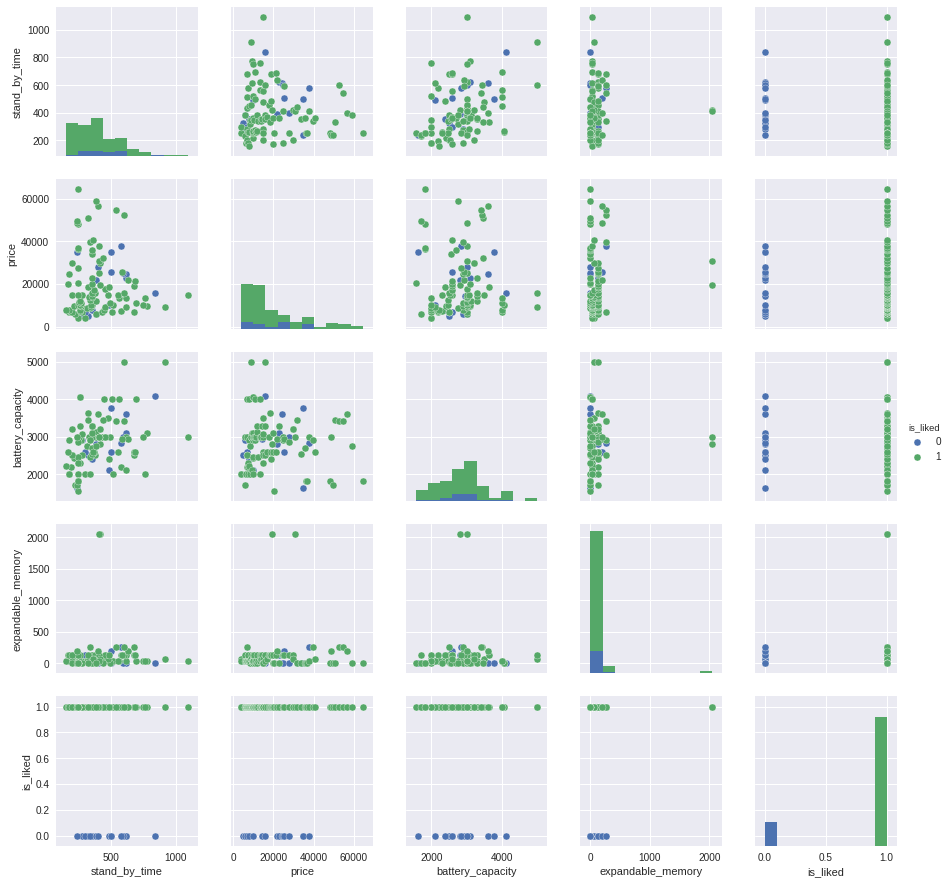

In [47]:
ax = sns.pairplot(df_thin , diag_kind='hist',hue='is_liked')

#Debbuging

In [0]:
import random

In [0]:
def factorial(x):
  if (x==0):
    return 1
  return x * factorial(x-1)

In [51]:
factorial(5)

120

In [0]:
def code_to_debug():
  import pdb; pdb.set_trace()
  for i in range(10):
    x = random.random()
    factorial(x)

In [54]:
factorial(4)

24

In [68]:
xmode verbose

Exception reporting mode: Verbose


In [69]:
code_to_debug()

RecursionError: ignored

In [0]:
def factorial_debuged(x):
  if (not isinstance(x,int)):
    print('supports only for int')
    return -1
  if (x==0):
    return 1
  return x * factorial(x-1)

In [0]:
def code_to_debug():
  import pdb; pdb.set_trace()
  for i in range(10):
    x = random.random()
    factorial_debuged(x)

In [65]:
code_to_debug()

> <ipython-input-64-d6c1db7b1952>(3)code_to_debug()
-> for i in range(10):
(Pdb) ?

Documented commands (type help <topic>):
EOF    c          d        h         list      q        rv       undisplay
a      cl         debug    help      ll        quit     s        unt      
alias  clear      disable  ignore    longlist  r        source   until    
args   commands   display  interact  n         restart  step     up       
b      condition  down     j         next      return   tbreak   w        
break  cont       enable   jump      p         retval   u        whatis   
bt     continue   exit     l         pp        run      unalias  where    

Miscellaneous help topics:
exec  pdb

(Pdb) help c
c(ont(inue))
        Continue execution, only stop when a breakpoint is encountered.
(Pdb) c
supports only for int
supports only for int
supports only for int
supports only for int
supports only for int
supports only for int
supports only for int
supports only for int
supports only for int
support